# Demo example: Using a Dataset
 
This is an introduction to get started with the MetObs toolkit. These examples are making use of the demo data files that are comes with the toolkit.
Once the MetObs toolkit package is installed, you can import its functionality by:

In [1]:
import metobs_toolkit

## The Dataset

A dataset is a collection of all observational data. Most of the methods are
applied directly on a dataset. Start by creating an empty dataset object:

In [2]:
your_dataset = metobs_toolkit.Dataset()

The most relevant attributes of a Dataset are:
    * .df --> a pandas DataFrame where all the observation data is stored
    * .metadf --> a pandas DataFrame where all the metadata for each station is stored
    * .settings --> a Settings object to store all specific settings.
    * .missing_obs and .gaps --> here the missing records and gaps are stored if present.

Note that each Dataset will be equipped with the default settings.


We created a dataset and stored in under the variable 'your_dataset'.
The show function prints out an overview of data in the dataset:

In [3]:
your_dataset.show() # or .get_info()


 --------  General --------- 

Empty instance of a Dataset.

 --------  Settings --------- 

(to show all settings use the .show_settings() method, or set show_all_settings = True)

 --------  Outliers --------- 

No outliers.

 --------  Meta data --------- 

No metadata is found.


TIP: to get an extensive overview of an object, call the .show() method on it.


## Importing data


To import your data into a Dataframe, the following files are required:
* data file: This is the csv file containing the observations
* (optional) metadata file: The csv file containing metadata for each station.
* template file: This is a csv file that is used to interpret your data file, and metadata file if present.

In practice you need to start by creating a template file for your data. More
information on the creation of the template can be found in documentation
(under [Mapping to the toolkit](https://vergauwenthomas.github.io/MetObs_toolkit/template_mapping.html)).

TIP: *Use the template assistant of the toolkit for creating a template file by uncommenting and running the following cell.*


In [4]:
# metobs_toolkit.build_template_prompt()

To import data, you must specify the paths to your data, metadata and template are.
For this example we use the demo data, metadata and template that comes with
the toolkit.

In [5]:
your_dataset.update_settings(
    input_data_file=metobs_toolkit.demo_datafile, # path to the data file
    input_metadata_file=metobs_toolkit.demo_metadatafile,
    template_file=metobs_toolkit.demo_template,
)

The settings of your dataset are updated with the required paths. Now the data can
be imported into your empty Dataset.

In [6]:
your_dataset.import_data_from_file()

## Inspecting the Data

To get an overview of the data stored in your dataset you can use

In [7]:
your_dataset.show()


 --------  General --------- 

Dataset instance containing: 
     *28 stations 
     *['temp', 'radiation_temp', 'humidity', 'precip', 'precip_sum', 'wind_speed', 'wind_gust', 'wind_direction', 'pressure', 'pressure_at_sea_level'] observation types 
     *120957 observation records 
     *256 records labeled as outliers 
     *0 gaps 
     *3 missing observations 
     *records range: 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:55:00+00:00 (total duration:  14 days 23:55:00) 
     *time zone of the records: UTC 
     *Coordinates are available for all stations. 


 --------  Settings --------- 

(to show all settings use the .show_settings() method, or set show_all_settings = True)

 --------  Outliers --------- 

A total of 256 found with these occurrences: 

{'invalid input': 256}

 --------  Meta data --------- 

The following metadata is found: ['network', 'lat', 'lon', 'call_name', 'location', 'geometry', 'assumed_import_frequency', 'dataset_resolution']

 The first rows of the m

If you want to inspect the data in your dataset directly, you can take a look at the .df and .metadf attributes

In [8]:
print(your_dataset.df.head())
# equivalent for the metadata
print(your_dataset.metadf.head())


                                     temp  radiation_temp  humidity  precip  \
name      datetime                                                            
vlinder01 2022-09-01 00:00:00+00:00  18.8             NaN        65     0.0   
          2022-09-01 00:05:00+00:00  18.8             NaN        65     0.0   
          2022-09-01 00:10:00+00:00  18.8             NaN        65     0.0   
          2022-09-01 00:15:00+00:00  18.7             NaN        65     0.0   
          2022-09-01 00:20:00+00:00  18.7             NaN        65     0.0   

                                     precip_sum  wind_speed  wind_gust  \
name      datetime                                                       
vlinder01 2022-09-01 00:00:00+00:00         0.0         5.6       11.3   
          2022-09-01 00:05:00+00:00         0.0         5.5       12.9   
          2022-09-01 00:10:00+00:00         0.0         5.1       11.3   
          2022-09-01 00:15:00+00:00         0.0         6.0       12.9   
  

### Inspecting a Station

If you are interested in one station, you can extract all the info for that one station from the dataset by:


In [9]:
favorite_station = your_dataset.get_station(stationname="vlinder02")

Favorite station now contains all the info of that one station. All methods
that are applicable on a Dataset are also applicable on a Station. So to inspect your favorite station you can:

In [10]:
print(favorite_station.show())


 --------  General --------- 

Dataset instance containing: 
     *1 stations 
     *['temp', 'radiation_temp', 'humidity', 'precip', 'precip_sum', 'wind_speed', 'wind_gust', 'wind_direction', 'pressure', 'pressure_at_sea_level'] observation types 
     *4317 observation records 
     *256 records labeled as outliers 
     *0 gaps 
     *3 missing observations 
     *records range: 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:55:00+00:00 (total duration:  14 days 23:55:00) 
     *time zone of the records: UTC 
     *Coordinates are available for all stations. 


 --------  Settings --------- 

(to show all settings use the .show_settings() method, or set show_all_settings = True)

 --------  Outliers --------- 

A total of 256 found with these occurrences: 

{'invalid input': 256}

 --------  Meta data --------- 

The following metadata is found: ['network', 'lat', 'lon', 'call_name', 'location', 'geometry', 'assumed_import_frequency', 'dataset_resolution']

 The first rows of the meta

## Making timeseries plots

To make timeseries plots, use the following syntax to plot the *temperature* observations of the full dataset:

<Axes: title={'center': 'Temperatuur for all stations. '}, ylabel='Temperatuur (Celcius) \n 2m-temperature'>

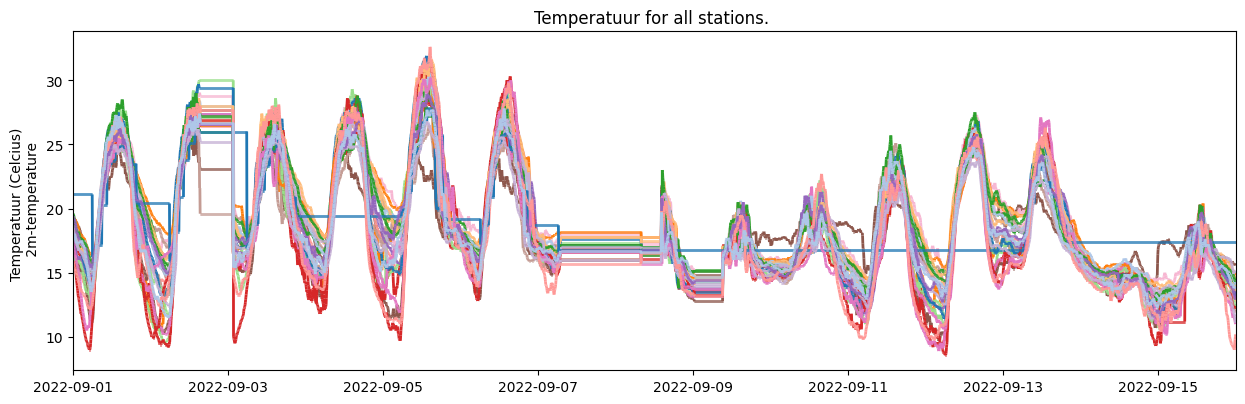

In [11]:
your_dataset.make_plot(obstype='temp')

See the documentation of the [make_plot](https://vergauwenthomas.github.io/MetObs_toolkit/_autosummary/metobs_toolkit.dataset.Dataset.html#metobs_toolkit.dataset.Dataset.make_plot) for more details of this method. Here an example of common used arguments.

<Axes: title={'center': 'your custom title'}, xlabel='datetime', ylabel='Vochtigheid (%) \n relative humidity'>

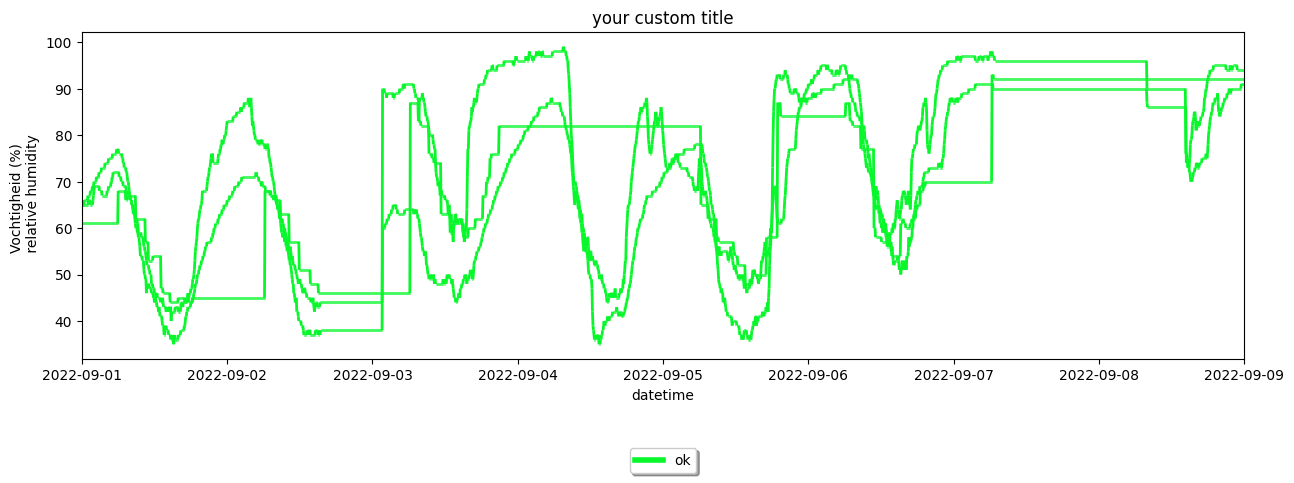

In [12]:
#Import the standard datetime library to make timestamps
from datetime import datetime

your_dataset.make_plot(
    # specify the names of the stations in a list, or use None to plot them all.
    stationnames=['vlinder01', 'vlinder03', 'vlinder05'],
    # what obstype to plot (default is 'temp')
    obstype="humidity",
    # choose how to color the timeseries:
    #'name' : a specific color per station
    #'label': a specific color per quality control label
    colorby="label",
    # choose a start en endtime for the series (datetime).
    # Default is None, wich uses all available data
    starttime=None,
    endtime=datetime(2022, 9, 9),
    # specify title, by default a title is created
    title='your custom title',
    # Add legend to plot?, by default true
    legend=True,
    # Plot observations that are labeld as outliers?
    show_outliers=True,
)

as mentioned above, one can apply the same methods on a Station object:


<Axes: title={'center': 'Temperatuur of vlinder02'}, xlabel='datetime', ylabel='Temperatuur (Celcius) \n 2m-temperature'>

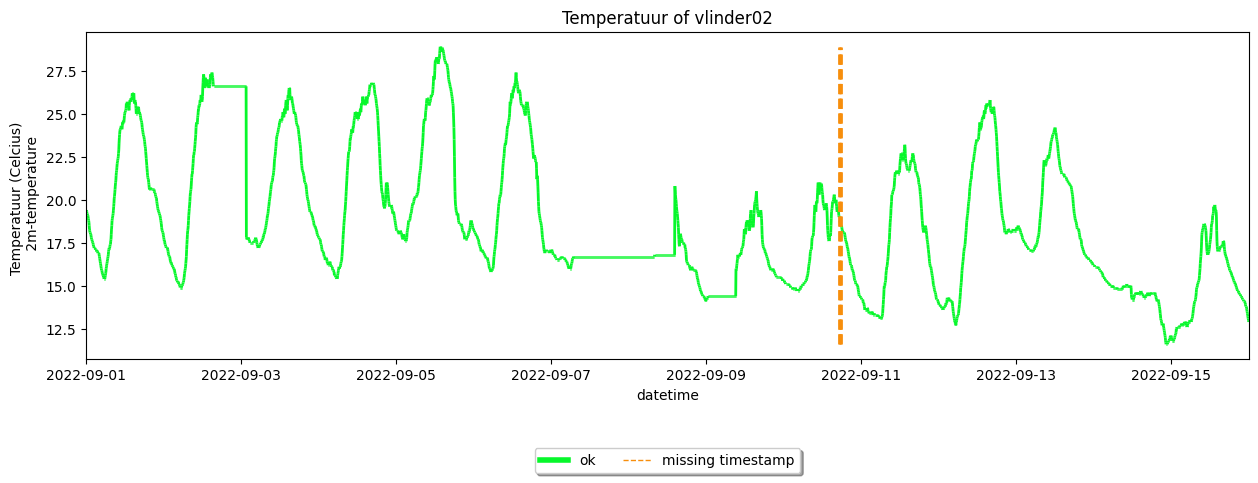

In [13]:
favorite_station.make_plot(colorby='label')

## Resampling the time resolution

Coarsening the time resolution (i.g. frequency) of you data can be done by using the [coarsen_time_resolution()](https://vergauwenthomas.github.io/MetObs_toolkit/_autosummary/metobs_toolkit.dataset.Dataset.html#metobs_toolkit.dataset.Dataset.coarsen_time_resolution).

In [14]:
your_dataset.coarsen_time_resolution(freq='30T') #30T == 30 minutes

your_dataset.df.head()

temp  radiation_temp  humidity  precip  \
name      datetime                                                            
vlinder01 2022-09-01 00:00:00+00:00  18.8             NaN        65     0.0   
          2022-09-01 00:30:00+00:00  18.7             NaN        65     0.0   
          2022-09-01 01:00:00+00:00  18.4             NaN        65     0.0   
          2022-09-01 01:30:00+00:00  18.0             NaN        65     0.0   
          2022-09-01 02:00:00+00:00  17.1             NaN        68     0.0   

                                     precip_sum  wind_speed  wind_gust  \
name      datetime                                                       
vlinder01 2022-09-01 00:00:00+00:00         0.0         5.6       11.3   
          2022-09-01 00:30:00+00:00         0.0         5.4        9.7   
          2022-09-01 01:00:00+00:00         0.0         5.1        8.1   
          2022-09-01 01:30:00+00:00         0.0         7.1       12.9   
          2022-09-01 02:00:00+00:00         0.0         5.7        9.7   

                                     wind_direction  pressure  \
name      datetime                                              
vlinder01 2022-09-01 00:00:00+00:00              65    101739   
          2022-09-01 00:30:00+00:00              85    101732   
          2022-09-01 01:00:00+00:00              55    101736   
          2022-09-01 01:30:00+00:00              55    101736   
          2022-09-01 02:00:00+00:00              45    101723   

                                     pressure_at_sea_level  
name      datetime                                          
vlinder01 2022-09-01 00:00:00+00:00               102005.0  
          2022-09-01 00:30:00+00:00               101999.0  
          2022-09-01 01:00:00+00:00               102003.0  
          2022-09-01 01:30:00+00:00               102003.0  
          2022-09-01 02:00:00+00:00               101990.0

## Detailed reference

For a more detailed reference you can use this [introduction example](https://github.com/vergauwenthomas/MetObs_toolkit/blob/master/examples/Introduction_01.ipynb).